In [19]:
import pandas as pd
from pathlib import Path


In [29]:
model = "mlp"
path = "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/crossValidation"
file = f"{model}_cv_results.csv"
df = pd.read_csv(f"{path}/{file}")

In [30]:
cols = list(df.columns)
i, j = cols.index("train_aucpr"), cols.index("train_f1_score")

cols[i], cols[j] = cols[j], cols[i]
df = df[cols]
df

,run_id,train_f1_score,val_aucpr,train_aucpr,val_f1_score,test_f1_score,test_aucpr
0,0622_124757,0.801493,0.886995,0.886995,0.801493,0.774579,0.853307
1,0622_124144,0.789168,0.855223,0.855223,0.789168,0.795455,0.867841
2,0622_123521,0.807799,0.870080,0.870080,0.807799,0.791436,0.865201
3,0622_122829,0.819216,0.899551,0.899551,0.819216,0.776989,0.849447
4,0622_122209,0.802703,0.872085,0.872085,0.802703,0.803759,0.886122
5,0622_121549,0.791789,0.859469,0.859469,0.791789,0.783767,0.861610
6,0622_120853,0.815742,0.875092,0.875092,0.815742,0.787617,0.856835
7,0622_120152,0.834621,0.906636,0.906636,0.834621,0.792453,0.853471
8,0622_115453,0.822462,0.899511,0.899511,0.822462,0.826825,0.888817
9,0622_114825,0.832385,0.911918,0.911918,0.832385,0.824268,0.899713


In [31]:
# Neue Zeilen mit Mittelwert und Standardabweichung
#df.loc["mean"] = df.mean(numeric_only=True)
df.loc["std"] = df.std(numeric_only=True)

df

,run_id,train_f1_score,val_aucpr,train_aucpr,val_f1_score,test_f1_score,test_aucpr
0,0622_124757,0.801493,0.886995,0.886995,0.801493,0.774579,0.853307
1,0622_124144,0.789168,0.855223,0.855223,0.789168,0.795455,0.867841
2,0622_123521,0.807799,0.870080,0.870080,0.807799,0.791436,0.865201
3,0622_122829,0.819216,0.899551,0.899551,0.819216,0.776989,0.849447
4,0622_122209,0.802703,0.872085,0.872085,0.802703,0.803759,0.886122
5,0622_121549,0.791789,0.859469,0.859469,0.791789,0.783767,0.861610
6,0622_120853,0.815742,0.875092,0.875092,0.815742,0.787617,0.856835
7,0622_120152,0.834621,0.906636,0.906636,0.834621,0.792453,0.853471
8,0622_115453,0.822462,0.899511,0.899511,0.822462,0.826825,0.888817
9,0622_114825,0.832385,0.911918,0.911918,0.832385,0.824268,0.899713


In [24]:
def summarize_cv_results(base_path, output_csv="mean_values_crossValidation.csv", std=False):
    models = ["mlp", "cnn", "lstm", "gru", "transformer", "gtn", "tft", "rf"]
    summary = []

    for model in models:
        csv_path = Path(base_path) / f"{model}_cv_results.csv"
        if not csv_path.exists():
            print(f"Path not found {csv_path}")
            continue

        df = pd.read_csv(csv_path)
        
        if std:
            f1_train = df.get("train_f1_score", pd.Series([float('nan')])).std()
            f1_val = df.get("val_f1_score", pd.Series([float('nan')])).std()
            f1_test = df.get("test_f1_score", pd.Series([float('nan')])).std()
            aucpr_train = df.get("train_aucpr", pd.Series([float('nan')])).std()
            aucpr_val = df.get("val_aucpr", pd.Series([float('nan')])).std()
            aucpr_test = df.get("test_aucpr", pd.Series([float('nan')])).std()
        else: 
            f1_train = df.get("train_f1_score", pd.Series([float('nan')])).mean()
            f1_val = df.get("val_f1_score", pd.Series([float('nan')])).mean()
            f1_test = df.get("test_f1_score", pd.Series([float('nan')])).mean()
            aucpr_train = df.get("train_aucpr", pd.Series([float('nan')])).mean()
            aucpr_val = df.get("val_aucpr", pd.Series([float('nan')])).mean()
            aucpr_test = df.get("test_aucpr", pd.Series([float('nan')])).mean()

        summary.append({
            "Abbreviations": model.upper(),
            "F1_Training": f1_train,
            "F1_Validation": f1_val,
            "F1_Testing": f1_test,
            "AUCPR_Training": aucpr_train,
            "AUCPR_Validation": aucpr_val,
            "AUCPR_Testing": aucpr_test
        })

    df_summary = pd.DataFrame(summary, columns=[
        "Abbreviations", "F1_Training", "F1_Validation", "F1_Testing",
        "AUCPR_Training", "AUCPR_Validation", "AUCPR_Testing"
    ])

    out_path = Path(base_path) / output_csv
    df_summary.to_csv(out_path, index=False)
    print(f"Saved at: {out_path}")

In [26]:
summarize_cv_results(path, "std_values_crossValidation.csv", std=True)
#then use CV Matrix in F1_Score_Comparison.ipynb to compare the F1 scores of the models and visualize them

Saved at: /Users/I566184/bachelorarbeit_coding/mesogeos/csv/crossValidation/std_values_crossValidation.csv


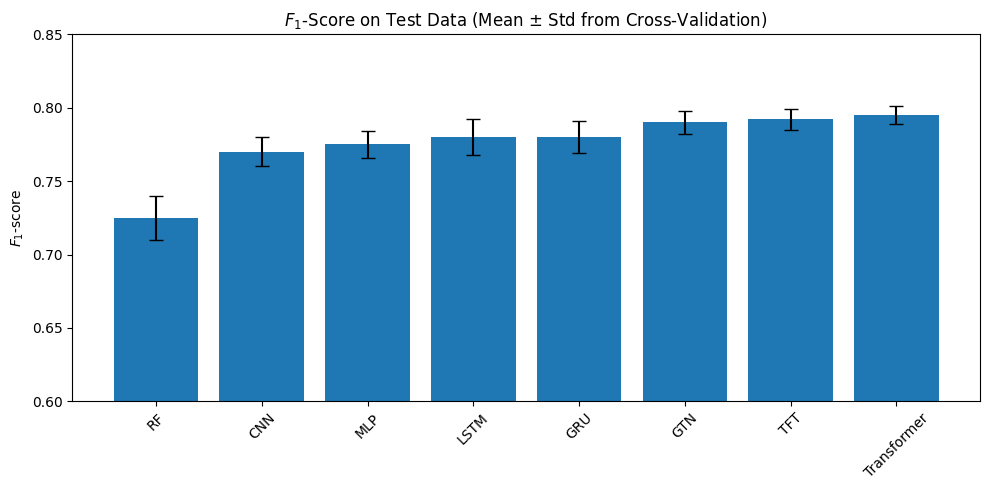

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Beispielwerte – ersetze mit deinen echten Werten
models = ['RF', 'CNN', 'MLP', 'LSTM', 'GRU', 'GTN', 'TFT', 'Transformer']
means = [0.725, 0.77, 0.775, 0.78, 0.78, 0.79, 0.792, 0.795]
stds  = [0.015, 0.01, 0.009, 0.012, 0.011, 0.008, 0.007, 0.006]  # Standardabweichungen

x = np.arange(len(models))

plt.figure(figsize=(10, 5))
bars = plt.bar(x, means, yerr=stds, capsize=5)

plt.xticks(x, models, rotation=45)
plt.ylim(0.6, 0.85)
plt.ylabel(r"$F_1$-score")
plt.title(r"$F_1$-Score on Test Data (Mean ± Std from Cross-Validation)")

plt.tight_layout()
plt.show()
